## S06 T01: Tasca mètodes de mostreig - Eduardo Baffi

Aprèn a realitzar mostreig de les dades amb Python.

#### Nivell 1
#### - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

El tema elegido fue: Formula 1 World Championship (1950 - 2021) - F1 race data from 1950 to 2021

*source: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020

In [6]:
# Leer archivo con detalles de los tiempos de cada vuelta.
laptimes_df = pd.read_csv('C:\\Users\\eduba\\Documents\\Notebooks\\lap_times.csv') #,sep=' ', header=None, error_bad_lines=False, warn_bad_lines=False, engine='python')
laptimes_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [7]:
# Leer archivo con detalles de las carreras
races_df = pd.read_csv('C:\\Users\\eduba\\Documents\\Notebooks\\races.csv')
races_df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [8]:
races_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url'], dtype='object')

In [9]:
newdf = races_df[(races_df.raceId == 841)]
newdf.head()

,raceId,year,round,circuitId,name,date,time,url
839,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...


In [10]:
newdf = races_df[(races_df.circuitId == 1)]
newdf.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
17,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
35,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...
54,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...
70,71,2005,1,1,Australian Grand Prix,2005-03-06,14:00:00,http://en.wikipedia.org/wiki/2005_Australian_G...


In [11]:
laptimes_df.info()
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495544 entries, 0 to 495543
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        495544 non-null  int64 
 1   driverId      495544 non-null  int64 
 2   lap           495544 non-null  int64 
 3   position      495544 non-null  int64 
 4   time          495544 non-null  object
 5   milliseconds  495544 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 22.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1058 non-null   int64 
 1   year       1058 non-null   int64 
 2   round      1058 non-null   int64 
 3   circuitId  1058 non-null   int64 
 4   name       1058 non-null   object
 5   date       1058 non-null   object
 6   time       1058 non-null   object
 7   url        1058 non-null   object

In [12]:
# Merge dos Dataframes
f1_newdf = laptimes_df.merge(races_df, on='raceId')
f1_newdf

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,date,time_y,url
0,841,20,1,1,1:38.109,98109,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
1,841,20,2,1,1:33.006,93006,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
2,841,20,3,1,1:32.713,92713,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
3,841,20,4,1,1:32.803,92803,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
4,841,20,5,1,1:32.342,92342,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495539,1055,853,60,19,1:27.116,87116,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
495540,1055,853,61,19,1:30.047,90047,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
495541,1055,853,62,19,1:27.399,87399,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
495542,1055,853,63,19,1:24.739,84739,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...


In [13]:
f1_newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495544 entries, 0 to 495543
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        495544 non-null  int64 
 1   driverId      495544 non-null  int64 
 2   lap           495544 non-null  int64 
 3   position      495544 non-null  int64 
 4   time_x        495544 non-null  object
 5   milliseconds  495544 non-null  int64 
 6   year          495544 non-null  int64 
 7   round         495544 non-null  int64 
 8   circuitId     495544 non-null  int64 
 9   name          495544 non-null  object
 10  date          495544 non-null  object
 11  time_y        495544 non-null  object
 12  url           495544 non-null  object
dtypes: int64(8), object(5)
memory usage: 52.9+ MB


In [14]:
f1_newdf.year.value_counts()

2012    25343
2016    24513
2011    24008
2019    23625
2013    22779
2010    22534
2018    22246
2014    21021
2017    20307
2006    19920
2015    19855
2007    19563
2008    19449
2005    19204
2004    18608
2020    18400
2000    17977
2001    17357
2002    17350
1997    17206
2009    17186
1998    16175
2003    16043
1999    15804
1996    14431
2021     4640
Name: year, dtype: int64

In [15]:
# Mostra aleatòria simple: 
# Hay 495544 registros de vueltas años de carreras de 1996 a 2021.
# Para un nivel alto de confianza haremos una mostra de alredor de 2% de la población: 10.000 registros


simplesample_df = f1_newdf.sample(10000)
simplesample_df

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,date,time_y,url
255089,98,44,23,8,1:12.860,72860,2004,9,19,United States Grand Prix,2004-06-20,\N,http://en.wikipedia.org/wiki/2004_United_State...
233418,111,18,3,10,1:26.701,86701,2003,4,21,San Marino Grand Prix,2003-04-20,\N,http://en.wikipedia.org/wiki/2003_San_Marino_G...
189167,168,60,45,11,2:02.690,122690,2000,11,10,German Grand Prix,2000-07-30,\N,http://en.wikipedia.org/wiki/2000_German_Grand...
55909,885,818,72,9,1:21.417,81417,2013,6,6,Monaco Grand Prix,2013-05-26,12:00:00,http://en.wikipedia.org/wiki/2013_Monaco_Grand...
394256,958,815,29,10,1:26.713,86713,2016,11,11,Hungarian Grand Prix,2016-07-24,12:00:00,https://en.wikipedia.org/wiki/2016_Hungarian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492194,1053,817,13,5,1:30.824,90824,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,13:00:00,http://en.wikipedia.org/wiki/2021_Emilia_Romag...
9624,848,1,17,4,1:44.363,104363,2011,8,12,European Grand Prix,2011-06-26,12:00:00,http://en.wikipedia.org/wiki/2011_European_Gra...
315193,45,17,21,4,1:35.648,95648,2007,10,20,European Grand Prix,2007-07-22,12:00:00,http://en.wikipedia.org/wiki/2007_European_Gra...
43505,875,807,47,6,1:43.049,103049,2012,16,35,Korean Grand Prix,2012-10-14,06:00:00,http://en.wikipedia.org/wiki/2012_Korean_Grand...


In [16]:
# Mostra sistemàtica: 

In [17]:
import random
random_number = random.randint(1,50)

# Define función para systematic sampling:
def syst_sampling(df, step):
    
    index = np.arange(random_number,len(df),step=step)
    syst_sample = df.iloc[index]
    return syst_sample
    
# Populación: 495544 registros. Step = 50 para mostra de ~2% de la población
# Mostra:

syst_sample = syst_sampling(f1_newdf, 50)
syst_sample

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,date,time_y,url
39,841,20,40,1,1:30.530,90530,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
89,841,1,32,2,1:34.258,94258,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
139,841,17,24,3,1:32.746,92746,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
189,841,808,16,4,1:53.795,113795,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
239,841,13,8,5,1:33.833,93833,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495339,1055,854,60,18,1:23.102,83102,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
495389,1055,847,46,12,1:24.241,84241,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
495439,1055,849,25,9,1:25.192,85192,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
495489,1055,853,10,16,1:58.697,118697,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...


In [18]:
syst_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9911 entries, 39 to 495539
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9911 non-null   int64 
 1   driverId      9911 non-null   int64 
 2   lap           9911 non-null   int64 
 3   position      9911 non-null   int64 
 4   time_x        9911 non-null   object
 5   milliseconds  9911 non-null   int64 
 6   year          9911 non-null   int64 
 7   round         9911 non-null   int64 
 8   circuitId     9911 non-null   int64 
 9   name          9911 non-null   object
 10  date          9911 non-null   object
 11  time_y        9911 non-null   object
 12  url           9911 non-null   object
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


#### Nivell 2
#### - Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

In [19]:
# Mostra estratificada:

In [20]:
f1_newdf.head(1)

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,date,time_y,url
0,841,20,1,1,1:38.109,98109,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

# Criterio para el split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.02)

# Data set split
# La característica para la estratificación fue el año de la carrera ('year') porque los coches y regals cambiam cada año.
for x, y in split.split(f1_newdf, f1_newdf['year']):
    stratified_random_sample = f1_newdf.iloc[y].sort_values(by='year')

# Mostra estratificada
stratified_random_sample

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,date,time_y,url
115815,226,56,62,5,1:32.595,92595,1996,3,25,Argentine Grand Prix,1996-04-07,\N,http://en.wikipedia.org/wiki/1996_Argentine_Gr...
118698,228,73,22,19,1:33.053,93053,1996,5,21,San Marino Grand Prix,1996-05-05,\N,http://en.wikipedia.org/wiki/1996_San_Marino_G...
125982,237,73,23,11,1:31.059,91059,1996,14,14,Italian Grand Prix,1996-09-08,\N,http://en.wikipedia.org/wiki/1996_Italian_Gran...
126512,238,35,38,2,1:23.378,83378,1996,15,27,Portuguese Grand Prix,1996-09-22,\N,http://en.wikipedia.org/wiki/1996_Portuguese_G...
118390,228,14,30,3,1:31.985,91985,1996,5,21,San Marino Grand Prix,1996-05-05,\N,http://en.wikipedia.org/wiki/1996_San_Marino_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491910,1052,815,37,4,1:35.987,95987,2021,1,3,Bahrain Grand Prix,2021-03-28,15:00:00,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...
492230,1053,817,49,6,1:20.276,80276,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,13:00:00,http://en.wikipedia.org/wiki/2021_Emilia_Romag...
493802,1054,841,25,16,1:23.310,83310,2021,3,75,Portuguese Grand Prix,2021-05-02,14:00:00,http://en.wikipedia.org/wiki/2021_Portuguese_G...
494771,1055,832,13,8,1:25.179,85179,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

# Criterio para el split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.02)

# La característica para la estratificación en este ejemplo fue el circuito.
for x, y in split.split(f1_newdf, f1_newdf['circuitId']):
    stratified_random_sample = f1_newdf.iloc[y].sort_values(by='circuitId')

# Mostra estratificada
stratified_random_sample

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,date,time_y,url
51524,880,819,17,19,1:35.631,95631,2013,1,1,Australian Grand Prix,2013-03-17,06:00:00,http://en.wikipedia.org/wiki/2013_Australian_G...
72739,900,820,38,15,1:37.967,97967,2014,1,1,Australian Grand Prix,2014-03-16,06:00:00,https://en.wikipedia.org/wiki/2014_Australian_...
286695,55,27,40,12,1:36.607,96607,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...
128555,207,14,14,2,1:33.225,93225,1997,1,1,Australian Grand Prix,1997-03-09,\N,http://en.wikipedia.org/wiki/1997_Australian_G...
407075,969,838,10,18,1:42.673,102673,2017,1,1,Australian Grand Prix,2017-03-26,05:00:00,https://en.wikipedia.org/wiki/2017_Australian_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481470,1039,815,53,5,1:21.556,81556,2020,9,76,Tuscan Grand Prix,2020-09-13,13:10:00,https://en.wikipedia.org/wiki/2020_Tuscan_Gran...
481303,1039,848,46,4,3:18.929,198929,2020,9,76,Tuscan Grand Prix,2020-09-13,13:10:00,https://en.wikipedia.org/wiki/2020_Tuscan_Gran...
481150,1039,1,11,1,1:22.549,82549,2020,9,76,Tuscan Grand Prix,2020-09-13,13:10:00,https://en.wikipedia.org/wiki/2020_Tuscan_Gran...
481665,1039,825,5,12,2:14.825,134825,2020,9,76,Tuscan Grand Prix,2020-09-13,13:10:00,https://en.wikipedia.org/wiki/2020_Tuscan_Gran...


In [23]:
# Mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique):

Text(0.5, 1.0, 'Total time laps per year')

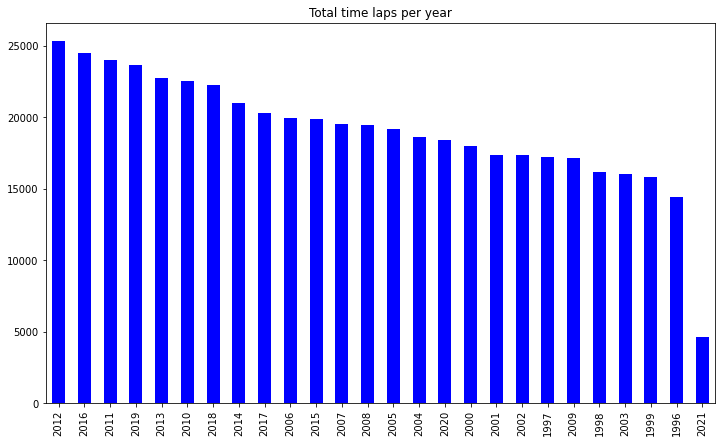

In [24]:
fig = f1_newdf.year.value_counts().plot(kind='bar',figsize=(12,7), color='blue')
fig.set_title('Total time laps per year')

El numero de vueltas en 2021 es mucho menor que en otros años porque el ano no ha terminado. Vamos a usar SMOTE para intentar corregir esta diferencia.

In [25]:
# Data preparation
#Drop columnas non necesarias 
to_drop = ['time_x', 'name', 'date', 'time_y', 'url']
f1_smote_df = f1_newdf.copy()
f1_smote_df.drop(to_drop, axis=1, inplace=True)
f1_smote_df

,raceId,driverId,lap,position,milliseconds,year,round,circuitId
0,841,20,1,1,98109,2011,1,1
1,841,20,2,1,93006,2011,1,1
2,841,20,3,1,92713,2011,1,1
3,841,20,4,1,92803,2011,1,1
4,841,20,5,1,92342,2011,1,1
...,...,...,...,...,...,...,...,...
495539,1055,853,60,19,87116,2021,4,4
495540,1055,853,61,19,90047,2021,4,4
495541,1055,853,62,19,87399,2021,4,4
495542,1055,853,63,19,84739,2021,4,4


In [26]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(f1_smote_df, f1_smote_df['year'])

print(f'''Shape of f1_smote_df before SMOTE: {f1_smote_df.shape}
Shape of f1_smote_df after SMOTE: {X_sm.shape}''')

print('\nBalance of each year after SMOTE (%):')
y_sm.value_counts(normalize=True) * 100

Shape of f1_smote_df before SMOTE: (495544, 8)
Shape of f1_smote_df after SMOTE: (658918, 8)

Balance of each year after SMOTE (%):


1996    3.846154
1997    3.846154
2020    3.846154
2019    3.846154
2018    3.846154
2017    3.846154
2016    3.846154
2015    3.846154
2014    3.846154
2013    3.846154
2012    3.846154
2011    3.846154
2010    3.846154
2009    3.846154
2008    3.846154
2007    3.846154
2006    3.846154
2005    3.846154
2004    3.846154
2003    3.846154
2002    3.846154
2001    3.846154
2000    3.846154
1999    3.846154
1998    3.846154
2021    3.846154
Name: year, dtype: float64

Text(0.5, 1.0, 'Total time laps per year after SMOTE')

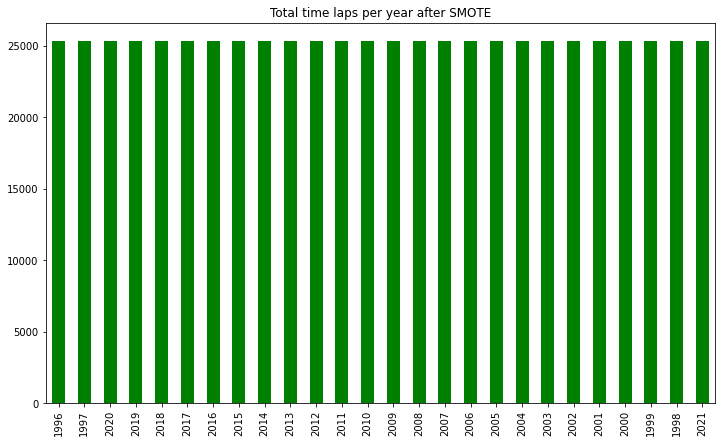

In [27]:
fig2 = X_sm.year.value_counts().plot(kind='bar',figsize=(12,7), color='green')
fig2.set_title('Total time laps per year after SMOTE')

In [28]:
# SMOTE Sample
X_sm

,raceId,driverId,lap,position,milliseconds,year,round,circuitId
0,841,20,1,1,98109,2011,1,1
1,841,20,2,1,93006,2011,1,1
2,841,20,3,1,92713,2011,1,1
3,841,20,4,1,92803,2011,1,1
4,841,20,5,1,92342,2011,1,1
...,...,...,...,...,...,...,...,...
658913,1052,847,21,16,99344,2021,1,3
658914,1053,817,26,7,91583,2021,2,22
658915,1053,1,46,4,78407,2021,2,21
658916,1053,844,56,4,79343,2021,2,21


#### Nivell 3
#### - Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [29]:
len(f1_newdf)

495544

In [285]:
f1_newdf.columns


Index(['raceId', 'driverId', 'lap', 'position', 'time_x', 'milliseconds',
       'year', 'round', 'circuitId', 'name', 'date', 'time_y', 'url'],
      dtype='object')

In [33]:
import random


dframe = pd.DataFrame(columns=['raceId', 'driverId', 'lap', 'position', 'time_x', 'milliseconds','year', 'round', 'circuitId', 
                               'name', 'date', 'time_y', 'url'])

def reserva(size, df):
  
    for i in range(len(df)):
        if i+1<= size:
            dframe.loc[i] = df.loc[i]
        else:
            probability = size/(i+1)
            if random.random() < probability:
                dframe.loc[random.choice(range(0,size))] = df.loc[i]
    return dframe

In [34]:
reserva(10000,f1_newdf) # Mostra con el metodo reservoir

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,date,time_y,url
0,867,818,15,17,1:48.738,108738,2012,8,12,European Grand Prix,2012-06-24,12:00:00,http://en.wikipedia.org/wiki/2012_European_Gra...
1,1024,840,29,6,1:49.937,109937,2019,15,15,Singapore Grand Prix,2019-09-22,12:10:00,https://en.wikipedia.org/wiki/2019_Singapore_G...
2,94,15,38,3,1:18.424,78424,2004,5,4,Spanish Grand Prix,2004-05-09,\N,http://en.wikipedia.org/wiki/2004_Spanish_Gran...
3,74,15,42,6,1:24.582,84582,2005,4,21,San Marino Grand Prix,2005-04-24,14:00:00,http://en.wikipedia.org/wiki/2005_San_Marino_G...
4,15,154,39,17,1:34.643,94643,2009,15,22,Japanese Grand Prix,2009-10-04,05:00:00,http://en.wikipedia.org/wiki/2009_Japanese_Gra...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,879,3,38,15,1:20.266,80266,2012,20,18,Brazilian Grand Prix,2012-11-25,16:00:00,http://en.wikipedia.org/wiki/2012_Brazilian_Gr...
9996,35,4,4,6,1:56.061,116061,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00,http://en.wikipedia.org/wiki/2008_Brazilian_Gr...
9997,187,71,41,9,1:26.342,86342,1999,13,14,Italian Grand Prix,1999-09-12,\N,http://en.wikipedia.org/wiki/1999_Italian_Gran...
9998,7,18,20,1,1:28.616,88616,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...


In [35]:
# Dataset principal exportado .csv
dframe.to_csv('Reservoir_sample.csv')

In [36]:
# Solucíon alternativa para reservoir sample
df_sample = pd.DataFrame(columns=['raceId', 'driverId', 'lap', 'position', 'time_x', 'milliseconds','year', 'round', 'circuitId', 
                               'name', 'date', 'time_y', 'url'])

def reservoir_sampling(sample_size, input):
    for i in range(len(input)):
        rand_idx = random.randrange(0,i+1)
        if rand_idx < sample_size:
            if len(df_sample) < sample_size:
                df_sample.loc[i] = input.loc[i]
            else:
                df_sample.loc[rand_idx] = input.loc[i]
    return df_sample


In [38]:
reservoir_sampling(5000, f1_newdf)

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,date,time_y,url
0,122,8,36,4,1:20.280,80280,2003,15,19,United States Grand Prix,2003-09-28,\N,http://en.wikipedia.org/wiki/2003_United_State...
1,337,9,26,11,2:00.603,120603,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...
2,885,807,75,10,1:21.834,81834,2013,6,6,Monaco Grand Prix,2013-05-26,12:00:00,http://en.wikipedia.org/wiki/2013_Monaco_Grand...
3,137,56,39,6,1:52.066,112066,2002,14,13,Belgian Grand Prix,2002-09-01,\N,http://en.wikipedia.org/wiki/2002_Belgian_Gran...
4,905,828,24,15,1:25.226,85226,2014,6,6,Monaco Grand Prix,2014-05-25,12:00:00,http://en.wikipedia.org/wiki/2014_Monaco_Grand...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,883,819,47,17,1:41.321,101321,2013,4,3,Bahrain Grand Prix,2013-04-21,12:00:00,http://en.wikipedia.org/wiki/2013_Bahrain_Gran...
4996,1002,844,37,14,1:24.843,84843,2018,14,14,Italian Grand Prix,2018-09-02,13:10:00,https://en.wikipedia.org/wiki/2018_Italian_Gra...
4997,355,10,37,18,1:49.841,109841,2010,19,24,Abu Dhabi Grand Prix,2010-11-14,13:00:00,http://en.wikipedia.org/wiki/2010_Abu_Dhabi_Gr...
4998,103,44,38,9,1:48.440,108440,2004,14,13,Belgian Grand Prix,2004-08-29,\N,http://en.wikipedia.org/wiki/2004_Belgian_Gran...
